In [1]:
import aim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
repo = aim.Repo('XXXXXXXX')

In [3]:
def get_metrics(hash_id):
    query = f'run.hash in ["{hash_id}"] and (metric.name in ["err_rate", "inv_m_new", "inv_f_new", "f1_binary", "inv_harm_mean", "cer", "unk_rate", "adj_mut_info", "aic"] or metric.name.startswith("class_unk_rate_") or metric.name.startswith("ttd"))'
    
    metric_values = {}

    for run_metrics_collection in repo.query_metrics(query).iter_runs():
        for metric in run_metrics_collection.iter():
            metric_df = metric.dataframe()

            if metric.name in ['inv_m_new', 'inv_f_new']:
                metric_values[metric.name[4:]] = np.subtract(np.ones(shape=()),metric_df['value'].to_numpy())
            else:
                metric_values[metric.name] = metric_df['value'].to_numpy()
    
    return metric_values

def print_plots(metric_values, path=None, line_handles=None):
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    linestyles = ['solid', 'dashed', 'dotted', 'dashdot']
    
    ## Group 1
    for i, metric_value in enumerate(metric_values):
        plt.plot((np.arange(0,len(metric_value['m_new'])) * 100 + 100) / 1000, metric_value['m_new'], label="$M_{new}$", color=colors[0], linestyle=linestyles[i])
        plt.plot((np.arange(0,len(metric_value['f_new'])) * 100 + 100) / 1000, metric_value['f_new'], label="$F_{new}$", color=colors[1], linestyle=linestyles[i])
        plt.plot((np.arange(0,len(metric_value['inv_harm_mean'])) * 100 + 100) / 1000, metric_value['inv_harm_mean'], label="$M_1$", color=colors[2], linestyle=linestyles[i])

    plt.xlabel('Timestamps (in thousands)', fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.ylim(0,1)
    #plt.xlim(0)
    handles = [Patch(facecolor=colors[0], label='$M_{new}$'), Patch(facecolor=colors[1], label='$F_{new}$'), Patch(facecolor=colors[2], label='$M_1$')]
    
    if line_handles is not None:
        legend1 = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.45, 1.18), ncol=5, fontsize=15)
        plt.gca().add_artist(legend1)
        handles2 = []
        for i, handle in enumerate(line_handles):
            handles2.append(Line2D([0], [0], color='black', linestyle=linestyles[i], label=handle))
        plt.legend(handles=handles2, loc='upper center', bbox_to_anchor=(0.45, 1.31), ncol=len(line_handles), fontsize=15)
    
    else:
        plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.45, 1.15), ncol=5, fontsize=15)
        
    
    
    
    plt.tight_layout()
    
    if path is not None:
        plt.savefig(f'{path}_bin.eps', format='eps', dpi=1200)
        
    plt.show()
    
    
        
    ## Group 2
    fig, ax1 = plt.subplots()
    plt.xticks(fontsize=15)
    

    for i, metric_value in enumerate(metric_values):
        ax1.plot((np.arange(0,len(metric_value['adj_mut_info'])) * 100 + 100) / 1000, metric_value['adj_mut_info'], label="$AMI$", color=colors[0], linestyle=linestyles[i])
        ax1.plot((np.arange(0,len(metric_value['cer'])) * 100 + 100) / 1000, metric_value['cer'], label="$CER$", color=colors[1], linestyle=linestyles[i])

        if i == 0:
            ax2 = ax1.twinx()

        ax2.plot((np.arange(0,len(metric_value['aic'])) * 100 + 100) / 1000, metric_value['aic'], label="$AIC$", color=colors[2], linestyle=linestyles[i])


    handles = [Patch(facecolor=colors[0], label='$AMI$'), Patch(facecolor=colors[1], label='$CER$'), Patch(facecolor=colors[2], label='$AIC$')]
    plt.yticks(fontsize=15)
    #plt.ylim(0,1)
    #plt.xlim(0)
    
    
    if line_handles is not None:
        legend1 = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=3, fontsize=15)
        plt.gca().add_artist(legend1)
        handles2 = []
        for i, handle in enumerate(line_handles):
            handles2.append(Line2D([0], [0], color='black', linestyle=linestyles[i], label=handle))
        ax1.legend(handles=handles2, loc='upper center', bbox_to_anchor=(0.5, 1.28), ncol=len(line_handles), fontsize=15)
        
    else:
        ax1.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=15)
        
    
    ax1.set_xlabel("Timestamps (in thousands)", fontsize=15)
    ax1.set_ylabel("AMI and CER Value", fontsize=15)
    ax2.set_ylabel("AIC Value", fontsize=15)
    
    plt.tight_layout()
    
    if path is not None:
        plt.savefig(f'{path}_mc.eps', format='eps', dpi=1200)

    plt.show()
    
    for i, metric_value in enumerate(metric_values):
        for metric in sorted(metric_value.keys()):
            if metric.startswith('ttd'):
                print(f"{metric}: {metric_value[metric][0]}")

# Baseline

100%|█████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 83.13it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


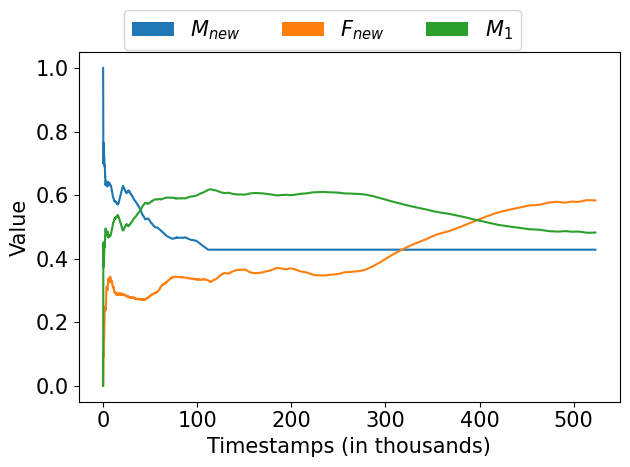

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


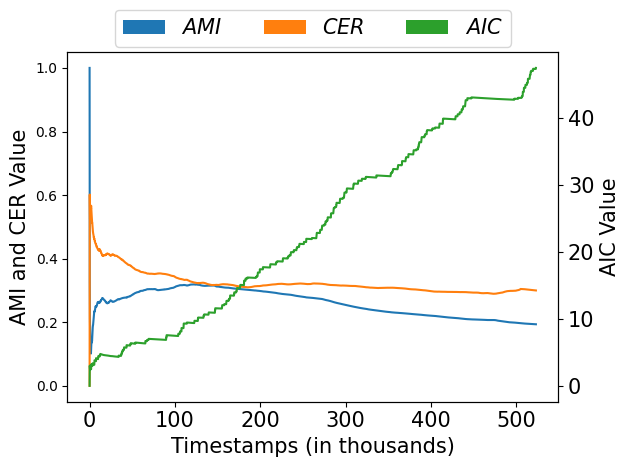

ttd_4: 270.0
ttd_5: 1083.0
ttd_6: 258.0
ttd_7: 451.0


In [4]:
#Forest Cover
metric_values = []
metric_values.append(get_metrics("XXXXXXXX"))
print_plots(metric_values, 'XXXXXXXX')

# Time Between the Appearance of Novel Classes

100%|█████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 90.84it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


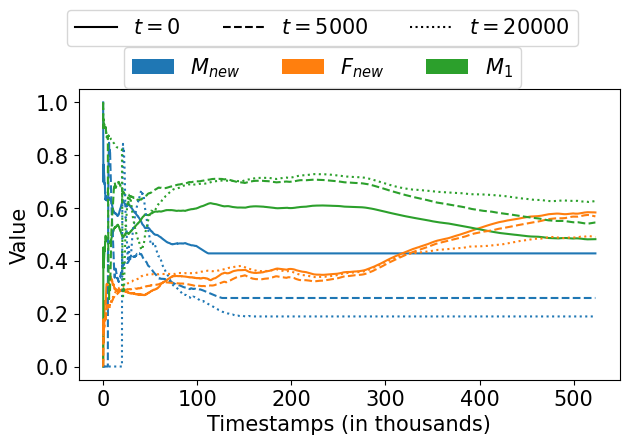

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


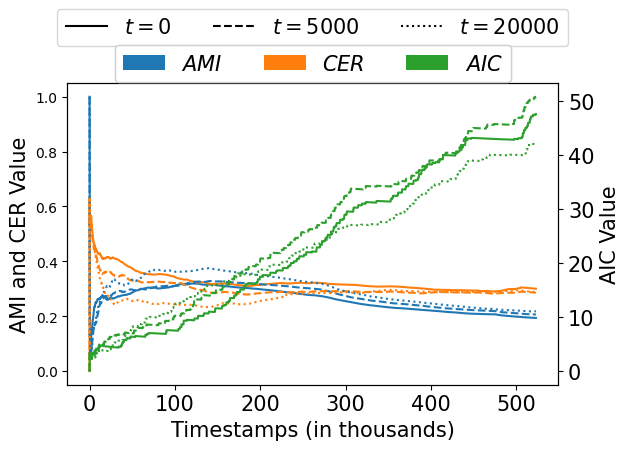

ttd_4: 270.0
ttd_5: 1083.0
ttd_6: 258.0
ttd_7: 451.0
ttd_4: 0.0
ttd_5: 931.0
ttd_6: 19.0
ttd_7: 169.0
ttd_4: 4.0
ttd_5: 9.0
ttd_6: 5.0
ttd_7: 211.0


In [5]:
metric_values = []
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
print_plots(metric_values, 'XXXXXXXX', ['$t=0$', '$t=5000$', '$t=20000$'])

# Ratio of Offline Samples

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 186.39it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


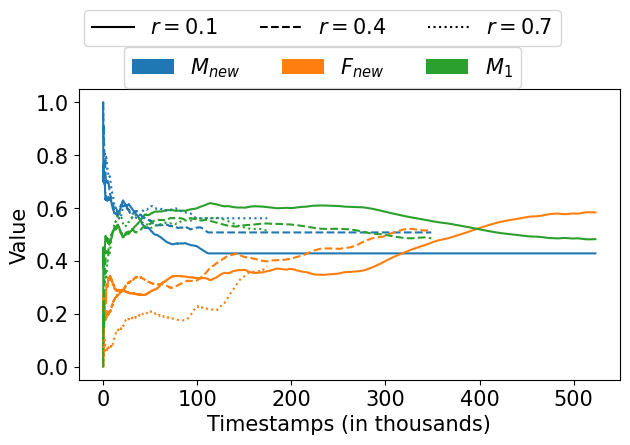

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


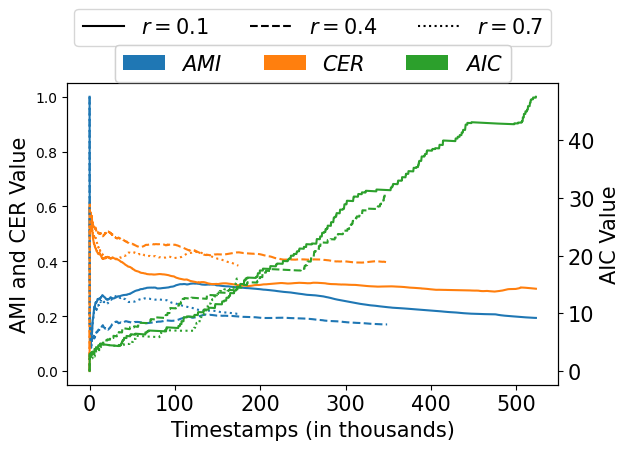

ttd_4: 270.0
ttd_5: 1083.0
ttd_6: 258.0
ttd_7: 451.0
ttd_4: 337.0
ttd_5: 1020.0
ttd_6: 363.0
ttd_7: 365.0
ttd_4: 525.0
ttd_5: 1076.0
ttd_6: 555.0
ttd_7: 478.0


In [6]:
metric_values = []
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
print_plots(metric_values, 'XXXXXXXX', ['$r=0.1$', '$r=0.4$', '$r=0.7$'])

# Number of Known Classes

100%|█████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 92.12it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


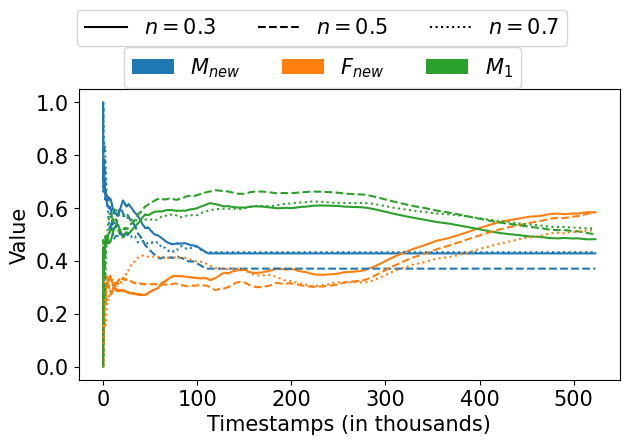

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


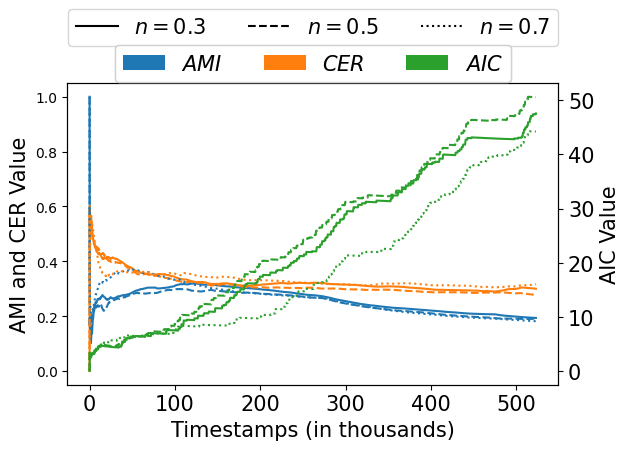

ttd_4: 270.0
ttd_5: 1083.0
ttd_6: 258.0
ttd_7: 451.0
ttd_5: 867.0
ttd_6: 278.0
ttd_7: 280.0
ttd_6: 400.0
ttd_7: 882.0


In [8]:
metric_values = []
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
metric_values.append(get_metrics("XXXXXXXX"))
print_plots(metric_values, 'XXXXXXXX', ['$n=0.3$','$n=0.5$', '$n=0.7$'])